## Image Preperation

#### Data set: https://github.com/ardamavi/Sign-Language-Digits-Dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd # To show current Jupyter notebook directory

'C:\\Users\\Muiz Alvi'

In [3]:
train_path = 'Sign-Language-Digits-Dataset/train'
valid_path = 'Sign-Language-Digits-Dataset/valid'
test_path = 'Sign-Language-Digits-Dataset/test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size = (224, 224), batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size = (224, 224), batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size = (224, 224), batch_size = 10, shuffle = False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


## Modify Model

In [5]:
mobile = keras.applications.mobilenet.MobileNet()

In [6]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [7]:
x = mobile.layers[-6].output
predictions = Dense(10, activation = 'softmax')(x)

In [13]:
model = keras.Model(inputs = mobile.input, outputs = predictions)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [18]:
for layer in model.layers[:23]:
    layer.trainable = False

## Training Model

In [19]:
model.compile(Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
model.fit_generator(train_batches, steps_per_epoch = 18, validation_data = valid_batches, validation_steps = 3, epochs = 60, verbose = 2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 18 steps, validate for 3 steps
Epoch 1/60
18/18 - 63s - loss: 2.0597 - accuracy: 0.3500 - val_loss: 1.9105 - val_accuracy: 0.4333
Epoch 2/60
18/18 - 46s - loss: 1.1077 - accuracy: 0.6444 - val_loss: 1.8167 - val_accuracy: 0.4667
Epoch 3/60
18/18 - 44s - loss: 0.5982 - accuracy: 0.8663 - val_loss: 1.5884 - val_accuracy: 0.5000
Epoch 4/60
18/18 - 46s - loss: 0.4915 - accuracy: 0.8278 - val_loss: 1.2926 - val_accuracy: 0.6000
Epoch 5/60
18/18 - 44s - loss: 0.3947 - accuracy: 0.8833 - val_loss: 1.1609 - val_accuracy: 0.6667
Epoch 6/60
18/18 - 42s - loss: 0.2668 - accuracy: 0.9389 - val_loss: 0.9821 - val_accuracy: 0.7000
Epoch 7/60
18/18 - 42s - loss: 0.2190 - accuracy: 0.9444 - val_loss: 0.8220 - val_accuracy: 0.7333
Epoch 8/60
18/18 - 42s - loss: 0.1806 - accuracy: 0.9556 - val_loss: 0.7818 - val_accuracy: 0.7333
Epoch 9/60
18/18 - 42s - loss: 0.1595 - a

## Predict Sign Language Digits

In [22]:
test_labels = test_batches.classes

In [23]:
predictions = model.predict(test_batches, steps = 5, verbose = 0)

In [24]:
# This function has been taken from the website of scikit Learn. link: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
cm = confusion_matrix(test_labels, predictions.argmax(axis = 1))

In [26]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [1 2 1 1 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 1 0 4 0 0 0]
 [0 0 0 0 1 0 0 4 0 0]
 [1 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 1 0 0 0 0 4]]


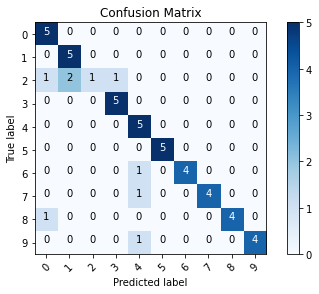

In [27]:
cm_plot_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')